In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

In [ ]:
!pip install auto_ts

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
!pip install dask distributed --upgrade

In [ ]:
import auto_ts as AT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,6

In [ ]:
df = pd.read_excel('/content/DataFrame_Processos_Percentual_Base_Completa.xlsx')
df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)
df.head(3)

,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
DiaInicio,,,,,
2021-01-05,2021-01-05 05:21:00,2021-01-05 07:40:00,Rotina_01,139,321.0
2021-01-06,2021-01-06 04:13:00,2021-01-06 05:54:00,Rotina_01,101,253.0
2021-01-07,2021-01-07 03:30:00,2021-01-07 05:24:00,Rotina_01,114,210.0


In [ ]:
# Filtra somente pelo Processo 04 - caso de uso para avaliação em questão
# Foi o que a princípio apresentou lentidão ao rodar em concorrência com o Processo 01
df = df.loc[df['Processo']=='Rotina_01'] #--> este é o correto

#### apenas para testes - fazer com base menor
#df = df.loc[(df['Processo']=='Rotina_04') & (df['DtHoraInicio']>='2021-09-01')]
#### apenas para testes


# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = ['TempoMinutos'])
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,321.0
2021-01-06,253.0
2021-01-07,210.0


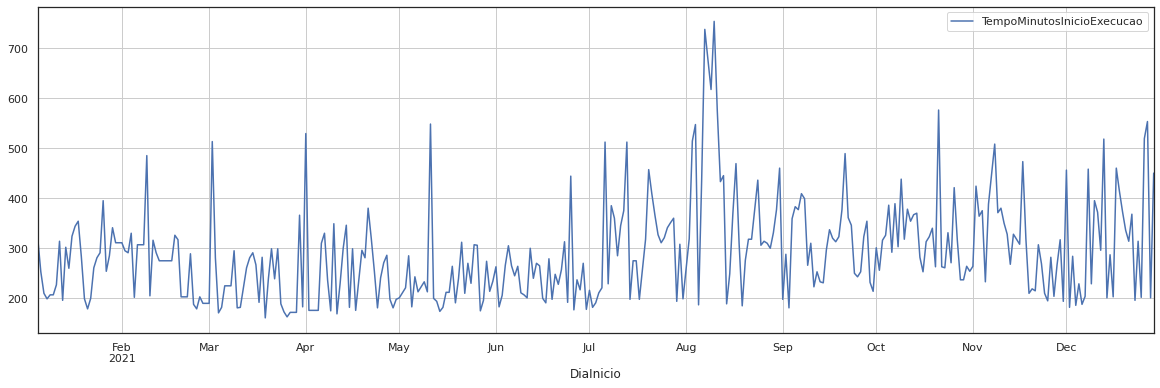

In [ ]:
df.plot(grid=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 2021-01-05 to 2021-12-29
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TempoMinutos  359 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [ ]:
# Define tamanho da base
tamanho_base = df.count() # 359 linhas

In [ ]:
# Define tamanho base Treino e Teste - usaremos inicialmente 2/3 para treinar e 1/3 para testar
train_size = int(tamanho_base * 2 / 3)
train_size

239

In [ ]:
# Define bases de treino
train_set = df[:train_size]
train_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,321.0
2021-01-06,253.0
2021-01-07,210.0


In [ ]:
# Define bases de teste
test_set = df[train_size:]
test_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-09-01,198.0
2021-09-02,288.0
2021-09-03,181.0


In [ ]:
print(train_set.shape, test_set.shape)


(239, 1) (120, 1)


Use Verbose=1 for more detailed charts

In [ ]:
model = AT.auto_timeseries(forecast_period=10, score_type='rmse', time_interval='D', model_type='best', verbose=1, seasonality=True)

Start of Fit.....
    Target variable given as = TempoMinutosInicioExecucao
Start of loading of data.....
    Inputs: ts_column = DiaInicio, sep = ,, target = ['TempoMinutosInicioExecucao']
    Using given input: pandas dataframe...
    train time series DiaInicio column is the index on test data...
    train data shape = (239, 1)
Alert: Could not detect strf_time_format of DiaInicio. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


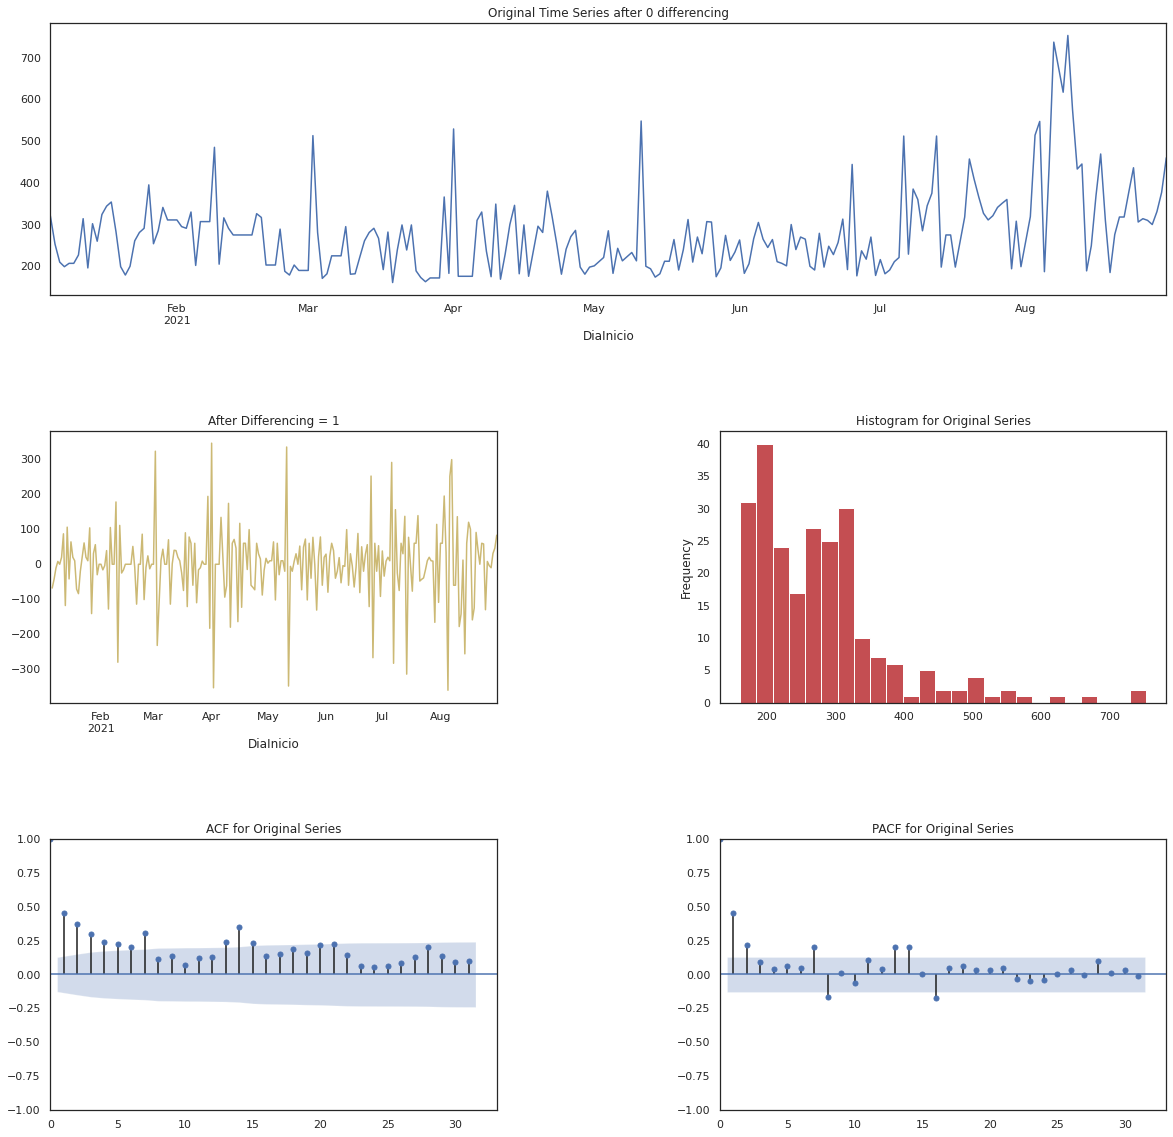

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(239, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding daily seasonality to Prophet with period=12, fourier_order=15 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 189 Test Shape: 10
    RMSE = 106.63
    Std Deviation of actuals = 101.44
    Normalized RMSE (as pct of std dev) = 105%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 199 Test Shape: 10
    RMSE = 62.17
    Std Deviation of actuals = 56.81
    Normalized RMSE (as pct of std dev) = 109%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 209 Test Shape: 10
    RMSE = 294.72
    Std Deviation of actuals = 171.62
    Normalized RMSE (as pct of std dev) = 172%
Cross Vali

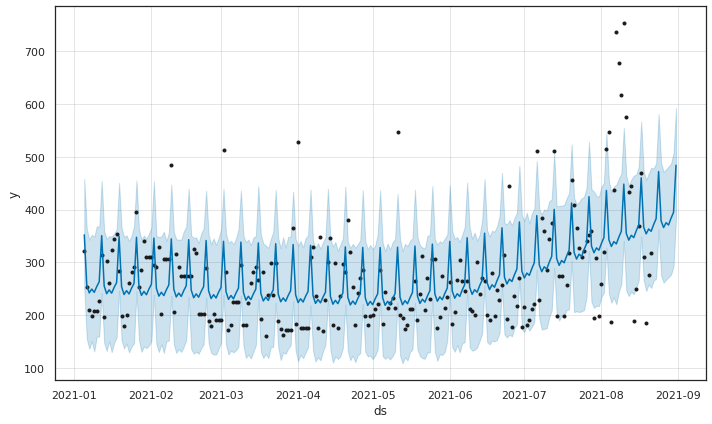

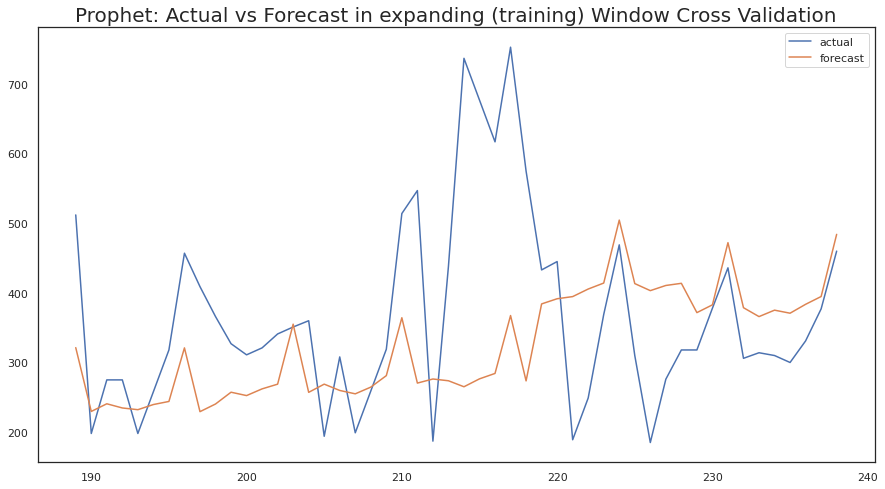

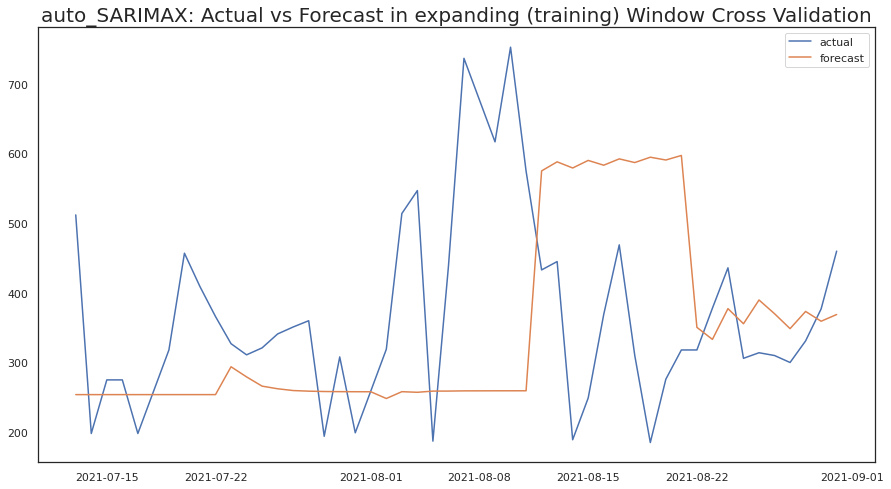

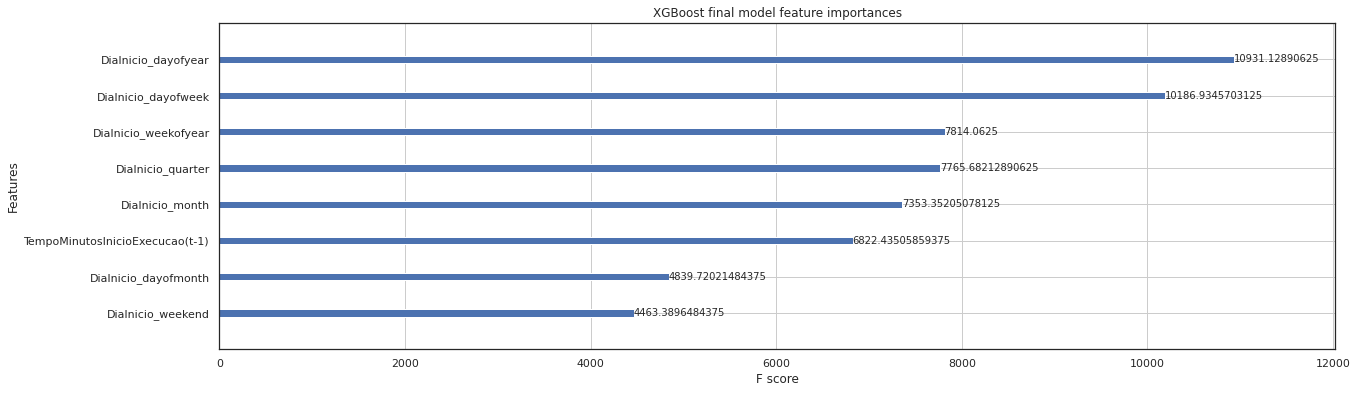

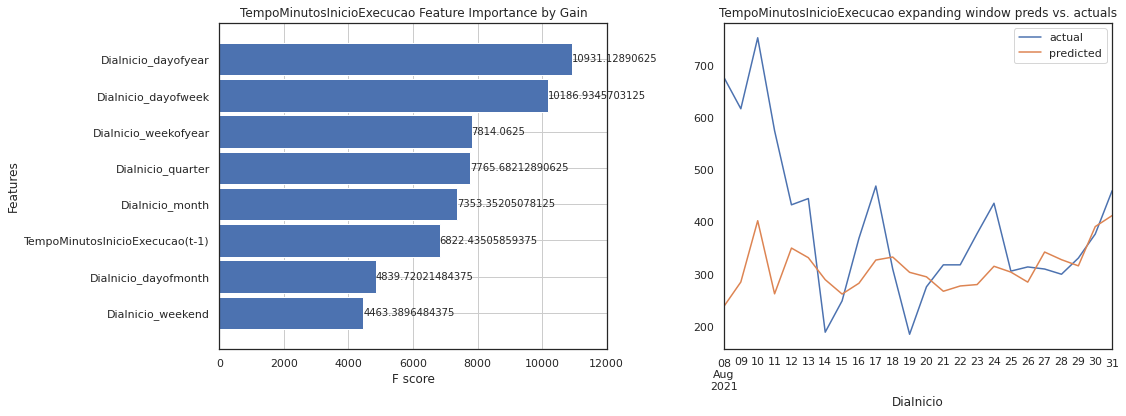

In [ ]:
model.fit(traindata= train_set, ts_column="DiaInicio", target="TempoMinutos")

In [ ]:
model.get_best_model_name()

'Prophet'

In [ ]:
model.get_ml_dict()

In [ ]:
model.get_leaderboard()

,name,rmse
0,Prophet,128.101857
3,ML,161.902856
1,auto_SARIMAX,170.383468
2,VAR,inf
